In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import ast
#Import des données 
df_info_rank=pd.read_csv('./Data/Data_utiles/info_rank_after_treatment')

df_info_rank.head()


,Unnamed: 0,ranking_date,rank,player_id,points,name_first,name_last,hand,height
0,0,19900101,1,100656,2913.0,Ivan,Lendl,R,188.0
1,1,19900101,2,101414,2279.0,Boris,Becker,R,190.0
2,2,19900101,3,101222,2111.0,Stefan,Edberg,R,188.0
3,3,19900101,4,100763,1398.0,Brad,Gilbert,R,185.0
4,4,19900101,5,100581,1354.0,John,McEnroe,L,180.0


### Visualisation de l'évolution du rang des joueurs au cours du temps

On va créer une fonction qui permet d'afficher l'évolution des joueurs du top 10 et les joueurs entre 40-50 sur une saison

In [3]:

def visualisation_rank(year, dataset, ax):
    """Cette fonction trace l'évolution du rang des joueurs du top 10 et du top 4"""
    df_year = dataset[(dataset['ranking_date'] >= year * 10000) & (dataset['ranking_date'] < (year + 1) * 10000)].copy()

    noms_10 = [nom for nom in df_year[:10]['name_last']]
    noms_40 = [nom for nom in df_year[40:50]['name_last']]
    noms = noms_10 + noms_40

    for i, nom in enumerate(noms):
        df_individu = df_year[df_year['name_last'] == nom].copy()
        df_individu['ranking_date'] = pd.to_datetime(df_individu['ranking_date'], format='%Y%m%d')

        ax.plot(df_individu['ranking_date'], df_individu['rank'], label='{}'.format(nom))

    ax.set_xlabel('Time')
    ax.set_ylabel('Rank')
    ax.set_title('Classement des joueurs en {}'.format(year))
    ax.legend(loc='upper left')

# On Calcule le nombre de lignes nécessaires en fonction du nombre d'années
num_years = len(range(1993, 2020))
num_rows = (num_years // 3) + (1 if num_years % 3 != 0 else 0)

# On Crée une disposition en grille pour les sous-plots
fig, axs = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))
fig.tight_layout(pad=5.0)

#On Utilise une boucle pour créer des sous-plots pour chaque année
for i, year in enumerate(range(1993, 2020)):
    row = i // 3
    col = i % 3
    visualisation_rank(year, df_info_rank, axs[row, col])


# Afficher la figure
plt.show()

        
    

KeyboardInterrupt: 

### Analyse

On remarque que les classements des joueurs qui au début de la saison étaient dans le top 10 fluctuent beaucoup moins que ceux des joueurs entre 40 et 50.

Pour en être sûr nous pouvons regarder la moyenne ainsi que les écarts types du rang de chaque joueur sur une saison. 


In [ ]:
def stats_rank(year,dataset):
    """Fonction qui chaque année renvoie un dataset avec pour chaque joueur son rang moyen ainsi que la variance
        de son rang.
        
        Elle renvoie aussi le rang moyen du top 10 et top 40-50 sur une saison (de même pour la variance moyenne)
    """
    df_year = dataset[(dataset['ranking_date'] >= year * 10000) & (dataset['ranking_date'] < (year + 1) * 10000)].copy()

    noms_10 = [nom for nom in df_year[:10]['name_last']]
    noms_40 = [nom for nom in df_year[40:50]['name_last']]
    noms = noms_10 + noms_40
    
    liste_moyenne=[]
    liste_std=[]
    for nom in noms:
        liste_moyenne.append(df_year[df_year['name_last'] == nom].copy()['rank'].mean())
        liste_std.append(df_year[df_year['name_last'] == nom].copy()['rank'].std())
    
    #On regarde en moyenne quelle est le classement sur une année du top 10 et top 50
    moyenne_10=sum(liste_moyenne[:10])/10
    moyenne_50=sum(liste_moyenne[10:20])/10

    #On regarde en moyenne quel est l'écart type sur des joueurs sur une saison 
    std_10=sum(liste_std[:10])/10
    std_50=sum(liste_std[10:20])/10
    
    df_stats_rank=pd.DataFrame(list(zip(noms,liste_moyenne,liste_std)), columns=["Noms","Rang Moyen","Std"])
    return df_stats_rank,moyenne_10,moyenne_50,std_10,std_50

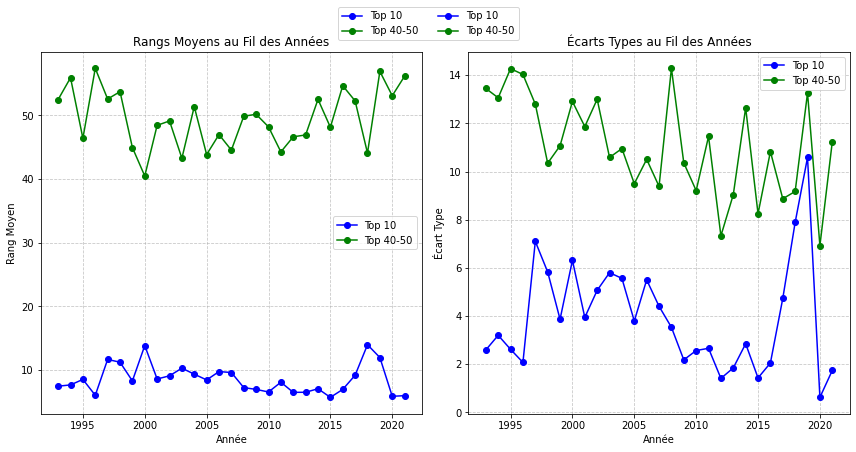

In [ ]:

liste_moyennes_10=[]
liste_std_10=[]

liste_moyennes_50=[]
liste_std_50=[]

temps=[i for i in range(1993,2022)]

for year in range(1993,2022):
    
    df_stats_rank,moyenne_10,moyenne_50,std_10,std_50=stats_rank(year,df_info_rank)
    liste_moyennes_10.append(moyenne_10)
    liste_moyennes_50.append(moyenne_50)
    liste_std_10.append(std_10)
    liste_std_50.append(std_50)


# Définir une couleur commune pour les deux styles de lignes pour une meilleure cohérence
couleur_top_10 = 'b'
couleur_top_50 = 'g'

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Tracé des rangs moyens
ax[0].plot(temps, liste_moyennes_10, label='Top 10', color=couleur_top_10, linestyle='-', marker='o')
ax[0].plot(temps, liste_moyennes_50, label='Top 40-50', color=couleur_top_50, linestyle='-', marker='o')

# Ajout de lignes de grille pour une meilleure lisibilité
ax[0].grid(True, linestyle='--', alpha=0.7)

# Tracé des écarts types
ax[1].plot(temps, liste_std_10, label='Top 10', color=couleur_top_10, linestyle='-', marker='o')
ax[1].plot(temps, liste_std_50, label='Top 40-50', color=couleur_top_50, linestyle='-', marker='o')

# Ajout de lignes de grille pour une meilleure lisibilité
ax[1].grid(True, linestyle='--', alpha=0.7)

# Titres et étiquettes
ax[0].set_title('Rangs Moyens au Fil des Années')
ax[1].set_title('Écarts Types au Fil des Années')

ax[0].set_xlabel('Année')
ax[0].set_ylabel('Rang Moyen')

ax[1].set_xlabel('Année')
ax[1].set_ylabel('Écart Type')

# Légendes
ax[0].legend()
ax[1].legend()

# Ajout d'une légende commune pour les deux sous-graphiques
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

# Ajustement de la mise en page pour un meilleur espacement
plt.tight_layout()

# Afficher le graphique
plt.show()


In [ ]:
liste=[]

for index,row in df_info_rank.iterrows():
    liste.append(row['player_id'])

liste_sans_doublons = []

for element in liste:
    if element not in liste_sans_doublons:
        liste_sans_doublons.append(element)



In [ ]:
print(len(liste_sans_doublons))

774


Dans cette partie, nous voulons représenter les différences sur l'aspects statistiques des joueurs classé dans le top 10 et ceux dans le top 40 et 50 

In [7]:
df=pd.read_csv('./Data/Data_utiles/info_joueurs.csv')
df_rank=pd.read_csv('./Data/Data_utiles/info_rank_after_treatment')

    

In [8]:

resultat_filtre = df_rank[(df_rank['ranking_date'] == 19950102) & (df_rank['rank'].between(1, 10))]
id_joueur_top10_95=[]

for i in resultat_filtre:
    id_joueur_top10_95.append(resultat_filtre['player_id'])





In [9]:
resultat_filtre = df_rank[(df_rank['ranking_date'] == 19950102) & (df_rank['rank'].between(1, 10))]
id_joueur_top10_95=[]

for i in resultat_filtre:
    id_joueur_top10_95.append(resultat_filtre['player_id'])
player_ids_filtrés = df_rank.loc[resultat_filtre.index, 'player_id'].tolist()


print(player_ids_filtrés)


[101948, 101736, 101414, 101843, 101964, 102021, 101222, 102238, 101529, 101774]


maintenant, on va récupérer un dataframe composé de toutes les stats pour l'année 1995 de notre joueur compris dans le top 10 en1995 et en faire la moyenne pour avoir la moyenne sur l'année de nos catégories pour un top 10

In [14]:


df_filtre = df[df['id'].isin(player_ids_filtrés)]
resultat = df_filtre[['id', '1995']]['1995']
L = []

for i in resultat:
    # Convertir la chaîne de caractères en dictionnaire en utilisant ast.literal_eval
    i_dict = ast.literal_eval(i)
    print(i)
    L.append(i_dict)




bbb = pd.DataFrame({
    'année':L})




def average_dict_values(df, column_name):
    # Récupérer la colonne avec les dictionnaires
    column = df[column_name]

    # Créer un dictionnaire pour stocker la moyenne de chaque clé
    average_dict = {}

    # Parcourir chaque dictionnaire dans la colonne
    for dictionary in column:
        # S'assurer que la valeur est un dictionnaire
        if isinstance(dictionary, dict):
            # Parcourir chaque clé et ajouter la valeur à la moyenne
            for key, value in dictionary.items():
                # Vérifier le type de la valeur
                if key not in average_dict:
                    average_dict[key] = 0
                # Si la valeur est une chaîne de caractères représentant un nombre, convertir et ajouter à la moyenne
                if isinstance(value, str):
                    # Vérifier si la valeur est en pourcentage
                    if '%' in value:
                        value = float(value.rstrip('%')) / 100.0
                    else:
                        value = float(value)
                    average_dict[key] += value
                elif isinstance(value, (int, float)):
                    average_dict[key] += value
                else:
                    print(f"La valeur {value} pour la clé {key} n'est pas de type numérique.")

    # Calculer la moyenne finale en divisant par le nombre total de dictionnaires
    num_dicts = len(column)
    for key in average_dict:
        average_dict[key] /= num_dicts

    return average_dict

# Exemple d'utilisation
data = pd.DataFrame({
    'nouveau_nom_colonne': [
        {'matchs': 61, 'win': 61, 'pourc_return_win': '27.5%'},
        {'matchs': 52, 'win': 52, 'pourc_return_win': '30.0%'},
        # ... autres lignes ...
    ]
})

result = average_dict_values(bbb, 'année')
print(result)


{'matchs': 61, 'win': 61, 'pourc_return_win_pnt': 0.41536137507377546, 'pourc_break_games': 0.2996638042427527, 'pourc_break_point_made': 0.0, 'pourc_break_point_saved': 0.0, 'pourc_serv_games_win': 0.9043910993186537, 'pourc_serv_in': 0.5957370995378348, 'Return Rating': 141.8, ' % Serve Return Points Won': '27.5%', ' % 2nd Serve Return Points Won': '52.4%', ' % Return Games Won': '22.2%', ' % Break Points Converted': '39.7%', 'Under Pressure Rating': 235.8, ' % Break Point Saved': '64.3%', ' % Break Points Converted Pressure': '39.7%', ' % Deciding Sets Won': '68.8%', ' % Tie Breaks Won': '63.0%'}
{'matchs': 52, 'win': 52, 'pourc_return_win_pnt': 0.4568529643137685, 'pourc_break_games': 0.41703665395690287, 'pourc_break_point_made': 0.0, 'pourc_break_point_saved': 0.0, 'pourc_serv_games_win': 0.8529736053915917, 'pourc_serv_in': 0.6184826606417643, 'Return Rating': 165.9, ' % Serve Return Points Won': '33.4%', ' % 2nd Serve Return Points Won': '55.0%', ' % Return Games Won': '32.6%',

In [ ]:

def average_dict_values(df, column_name):
    # Récupérer la colonne avec les dictionnaires
    column = df[column_name]

    # Créer un dictionnaire pour stocker la moyenne de chaque clé
    average_dict = {}

    # Parcourir chaque dictionnaire dans la colonne
    for dictionary in column:
        # S'assurer que la valeur est un dictionnaire
        if isinstance(dictionary, dict):
            # Parcourir chaque clé et ajouter la valeur à la moyenne
            for key, value in dictionary.items():
                # Vérifier le type de la valeur
                if key not in average_dict:
                    average_dict[key] = 0
                # Si la valeur est une chaîne de caractères représentant un nombre, convertir et ajouter à la moyenne
                if isinstance(value, str):
                    # Vérifier si la valeur est en pourcentage
                    if '%' in value:
                        value = float(value.rstrip('%')) / 100.0
                    else:
                        value = float(value)
                    average_dict[key] += value
                elif isinstance(value, (int, float)):
                    average_dict[key] += value
                else:
                    print(f"La valeur {value} pour la clé {key} n'est pas de type numérique.")

    # Calculer la moyenne finale en divisant par le nombre total de dictionnaires
    num_dicts = len(column)
    for key in average_dict:
        average_dict[key] /= num_dicts

    return average_dict



{'matchs': 65.7, 'win': 65.7, 'pourc_return_win_pnt': 0.4286940505149369, 'pourc_break_games': 0.34710558328303687, 'pourc_break_point_made': 0.0, 'pourc_break_point_saved': 0.0, 'pourc_serv_games_win': 0.8891853433380226, 'pourc_serv_in': 0.599372741047122, 'Return Rating': 154.15, ' % Serve Return Points Won': 0.30410000000000004, ' % 2nd Serve Return Points Won': 0.5383000000000001, ' % Return Games Won': 0.2755, ' % Break Points Converted': 0.4236000000000001, 'Under Pressure Rating': 230.20000000000005, ' % Break Point Saved': 0.6468, ' % Break Points Converted Pressure': 0.4236000000000001, ' % Deciding Sets Won': 0.6594, ' % Tie Breaks Won': 0.5722}


In [47]:
import pandas as pd
import ast

# ... (votre code précédent pour la fonction average_dict_values) ...

# Définir la plage d'années souhaitées
annees = [19960101, 19970106,19980105,19990104,20000110,20010108,20020107,20030106,20040105,20050110,20060109,20070108,20080107,20090119,20100104,20110110,20120102,20130107,20140106,20150105,20160111,20170109,20180108,20190114,20200106,20210104]  # Ajoutez les années nécessaires

# Dictionnaire final pour stocker les résultats par année
resultats_par_anneetop10 = {}

# Itération sur les années
for annee in annees:
    # Filtrer les données pour l'année spécifique
    resultat_filtre = df_rank[(df_rank['ranking_date'] == annee) & (df_rank['rank'].between(1, 10))]
    id_joueurs_top10 = resultat_filtre['player_id'].tolist()

    # Filtrer le dataframe principal en utilisant les ID des joueurs
    df_filtre = df[df['id'].isin(id_joueurs_top10)]

    # Extraire la colonne '1995' et convertir les chaînes de caractères en dictionnaires
    resultat = df_filtre[['id', str(annee)[:4]]][str(annee)[:4]]
    L = []
    for i in resultat:
        i_dict = ast.literal_eval(i)
        L.append(i_dict)
        

    # Créer un dataframe avec les dictionnaires extraits
    data_annee = pd.DataFrame({
        'année': L
    })

    # Calculer la moyenne des valeurs pour chaque année
    resultats_par_anneetop10[annee] = average_dict_values(data_annee, 'année')
print(resultats_par_anneetop10)
# Afficher les résultats par année
for annee, resultat in resultats_par_anneetop10.items():
    print(f'Résultats pour l\'année {str(annee)[:4]}:')
    print(resultat)


{19960101: {'matchs': 71.5, 'win': 71.5, 'pourc_return_win_pnt': 0.42527189104493984, 'pourc_break_games': 0.3402860096312335, 'pourc_break_point_made': 0.0, 'pourc_break_point_saved': 0.0, 'pourc_serv_games_win': 0.8861052240585214, 'pourc_serv_in': 0.5781493638862562, 'Under Pressure Rating': 234.4, ' % Break Point Saved': 0.6401000000000001, ' % Break Points Converted Pressure': 0.42000000000000004, ' % Deciding Sets Won': 0.6917000000000001, ' % Tie Breaks Won': 0.5922000000000001}, 19970106: {'matchs': 54.6, 'win': 54.6, 'pourc_return_win_pnt': 0.42052186374306044, 'pourc_break_games': 0.332031399015825, 'pourc_break_point_made': 0.0, 'pourc_break_point_saved': 0.0, 'pourc_serv_games_win': 0.889655723992482, 'pourc_serv_in': 0.5750923002223793}, 19980105: {'matchs': 64.7, 'win': 64.7, 'pourc_return_win_pnt': 0.43861741965712425, 'pourc_break_games': 0.36564663125645824, 'pourc_break_point_made': 0.0, 'pourc_break_point_saved': 0.0, 'pourc_serv_games_win': 0.8795825937915522, 'pour

In [48]:
import pandas as pd
import ast

def resultats_par_annee_moyens(df, df_rank, years,rang_a,rang_b):
    # Dictionnaire final pour stocker les résultats par année
    resultats_par_annee = {}

    # Itération sur les années
    for annee in years:
        # Filtrer les données pour l'année spécifique
        resultat_filtre = df_rank[(df_rank['ranking_date'] == annee) & (df_rank['rank'].between(rang_a, rang_b))]
        id_joueurs = resultat_filtre['player_id'].tolist()

        # Filtrer le dataframe principal en utilisant les ID des joueurs
        df_filtre = df[df['id'].isin(id_joueurs)]

        # Extraire la colonne correspondant à l'année et convertir les chaînes de caractères en dictionnaires
        resultat_colonne = df_filtre[['id', str(annee)[:4]]][str(annee)[:4]]
        L = []
        for i in resultat_colonne:
            i_dict = ast.literal_eval(i)
            L.append(i_dict)

        # Créer un dataframe avec les dictionnaires extraits
        data_annee = pd.DataFrame({
            'année': L
        })

        # Calculer la moyenne des valeurs pour chaque année
        resultats_par_annee[str(annee)[:4]] = average_dict_values(data_annee, 'année')

    return resultats_par_annee

# Ajoutez la définition de la fonction average_dict_values ici
# ...

# Utilisez la fonction resultats_par_annee_moyens en passant vos DataFrames et la liste des années



In [49]:
resultats_par_anneetop10 = resultats_par_annee_moyens(df, df_rank, annees,1,11)
resultats_par_anneetop40_50 = resultats_par_annee_moyens(df, df_rank, annees,40,50)



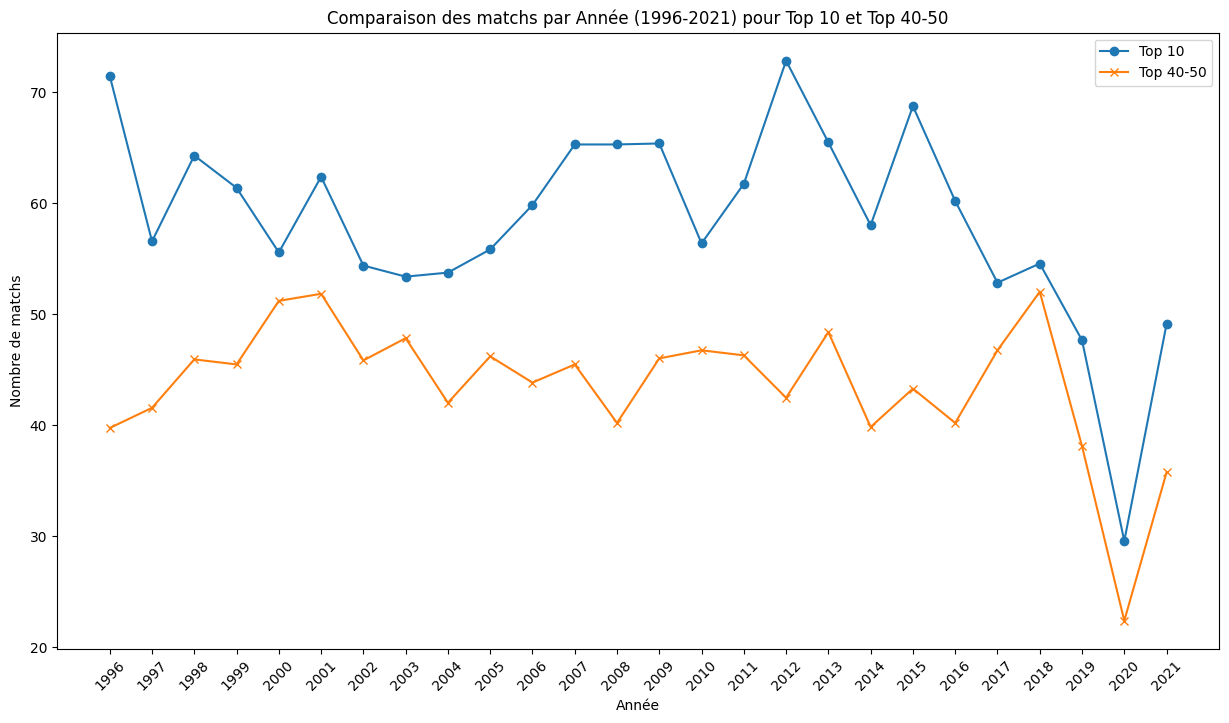

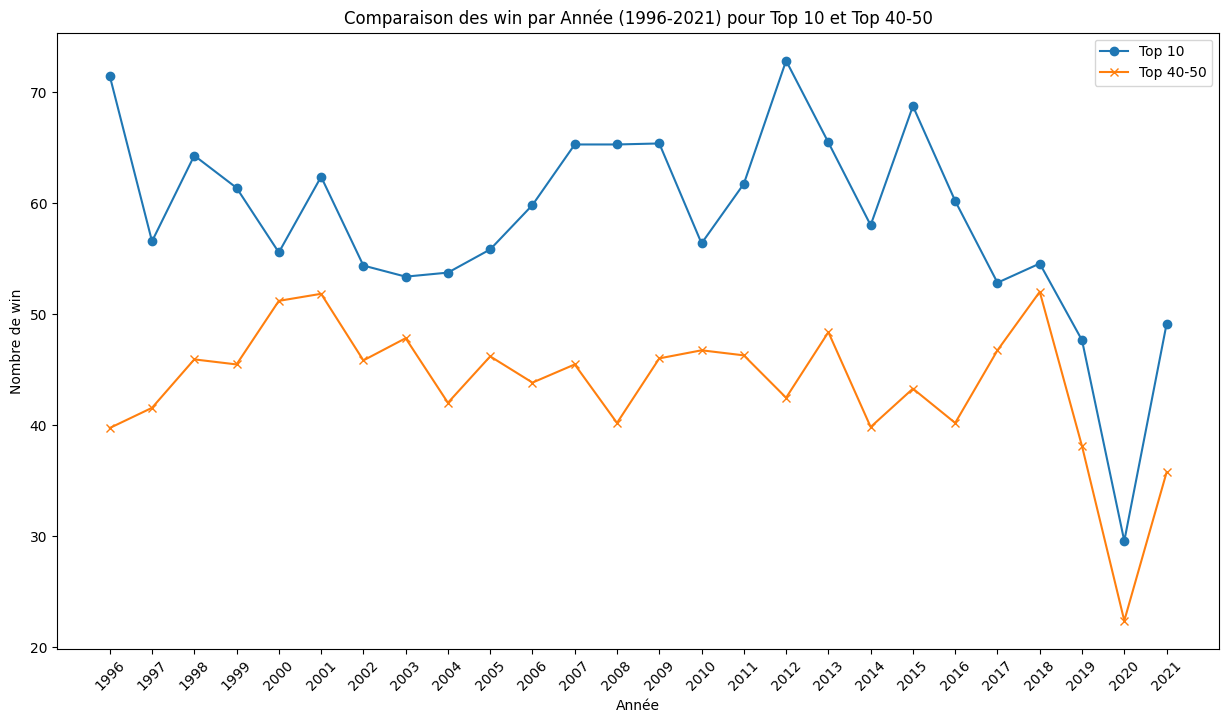

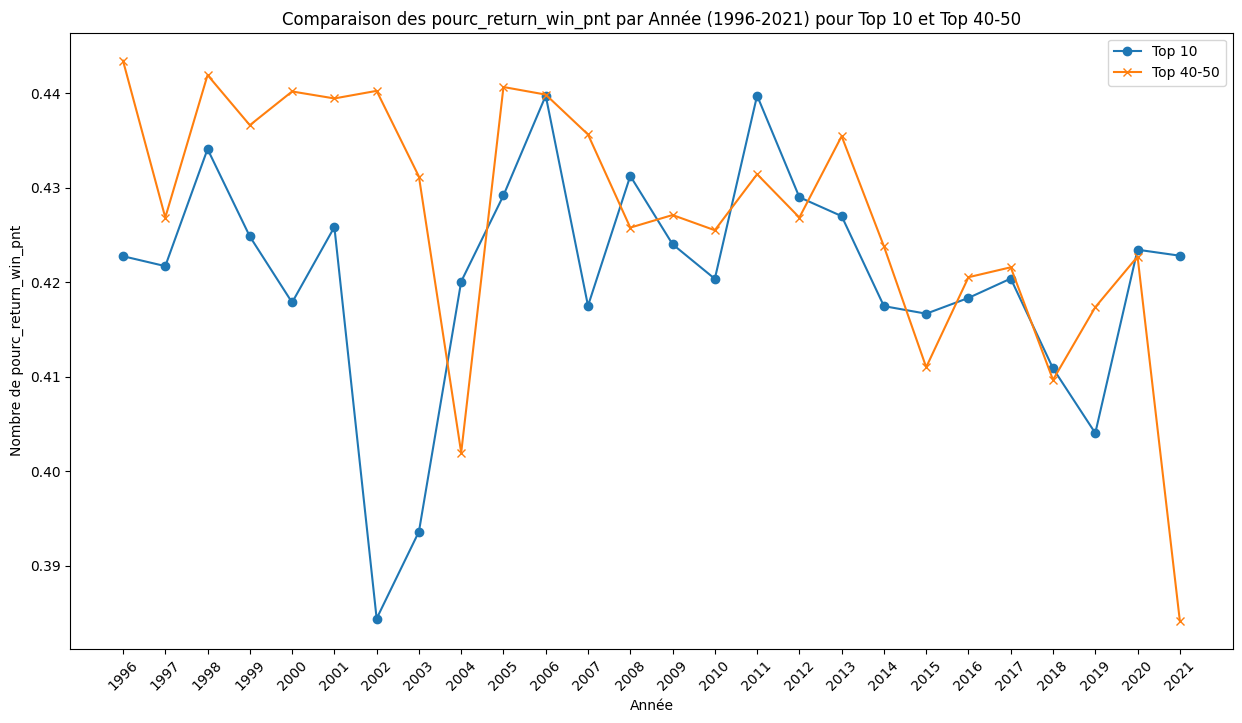

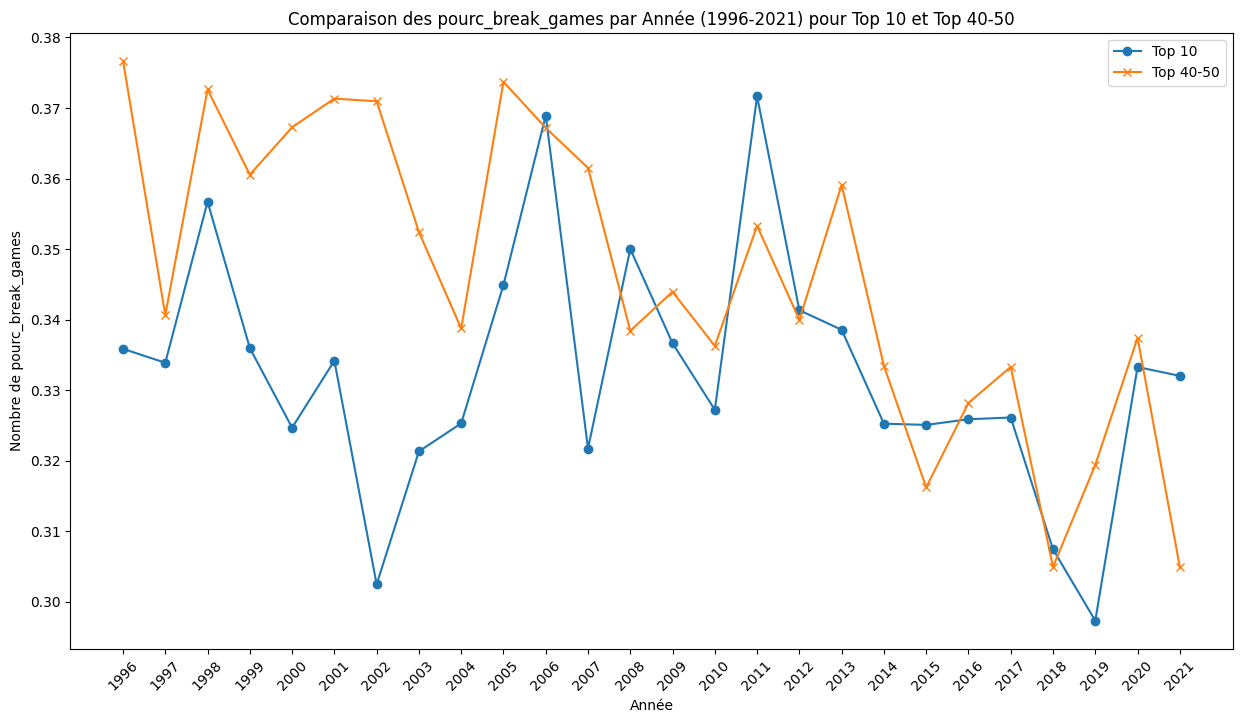

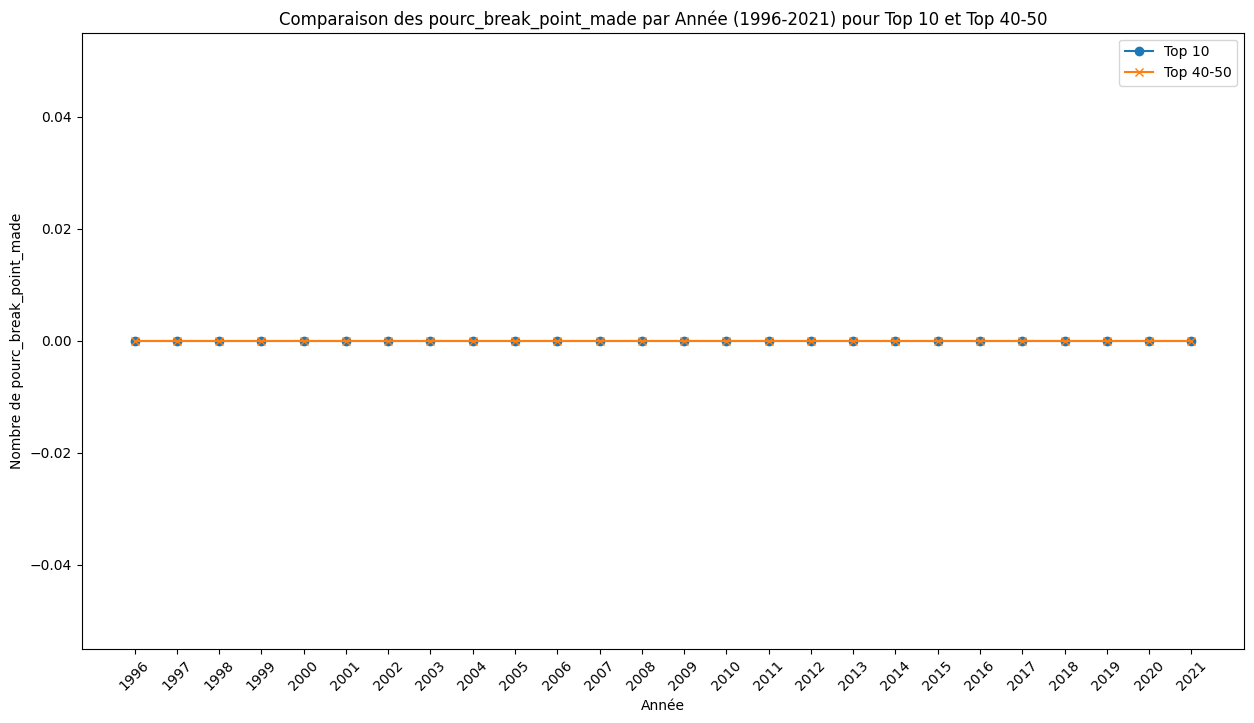

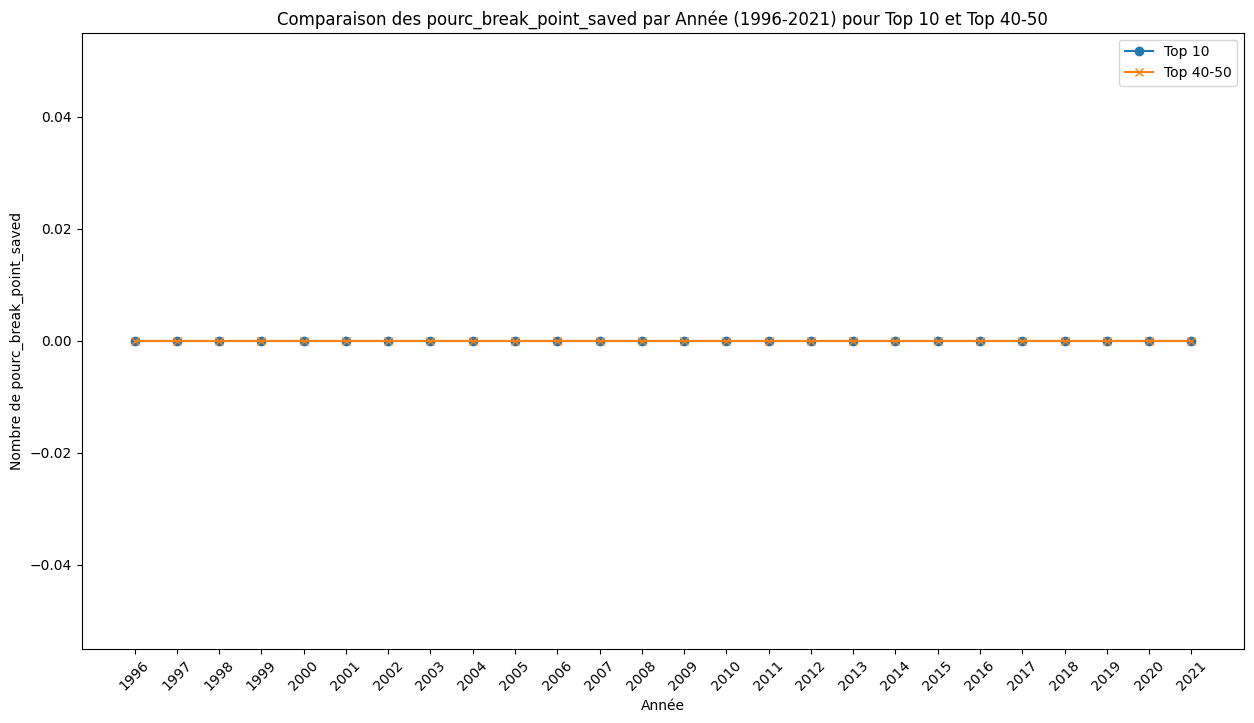

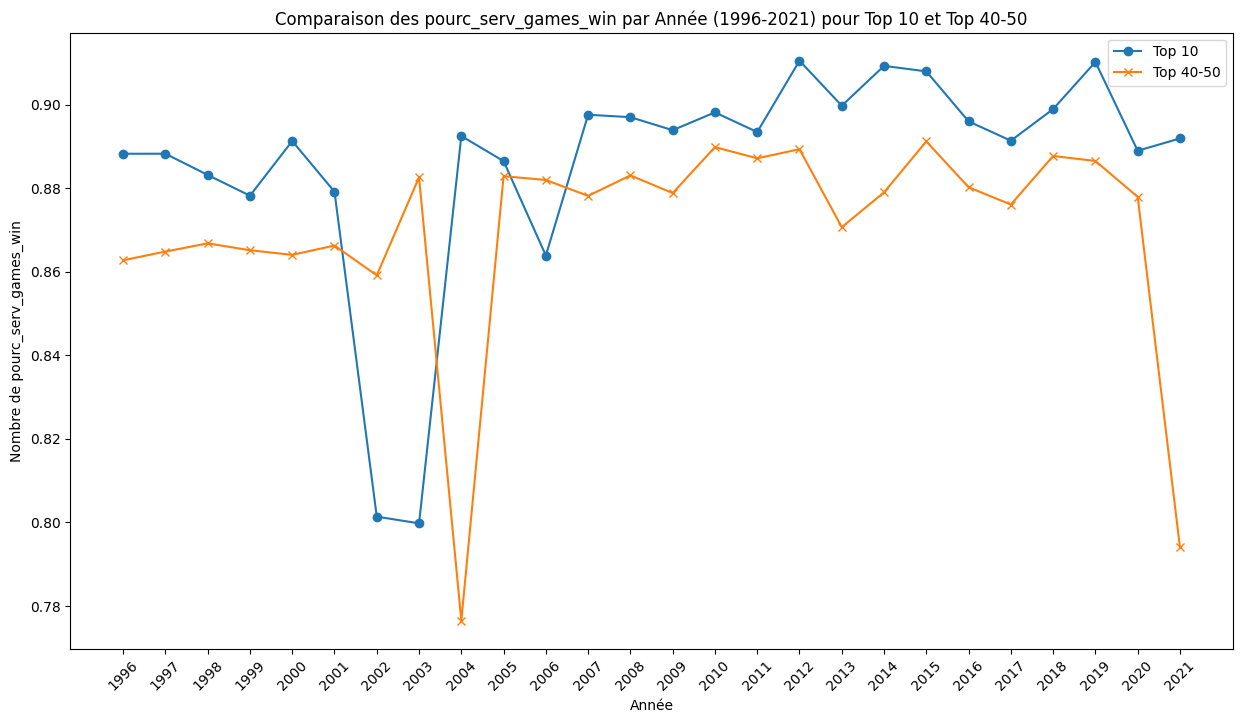

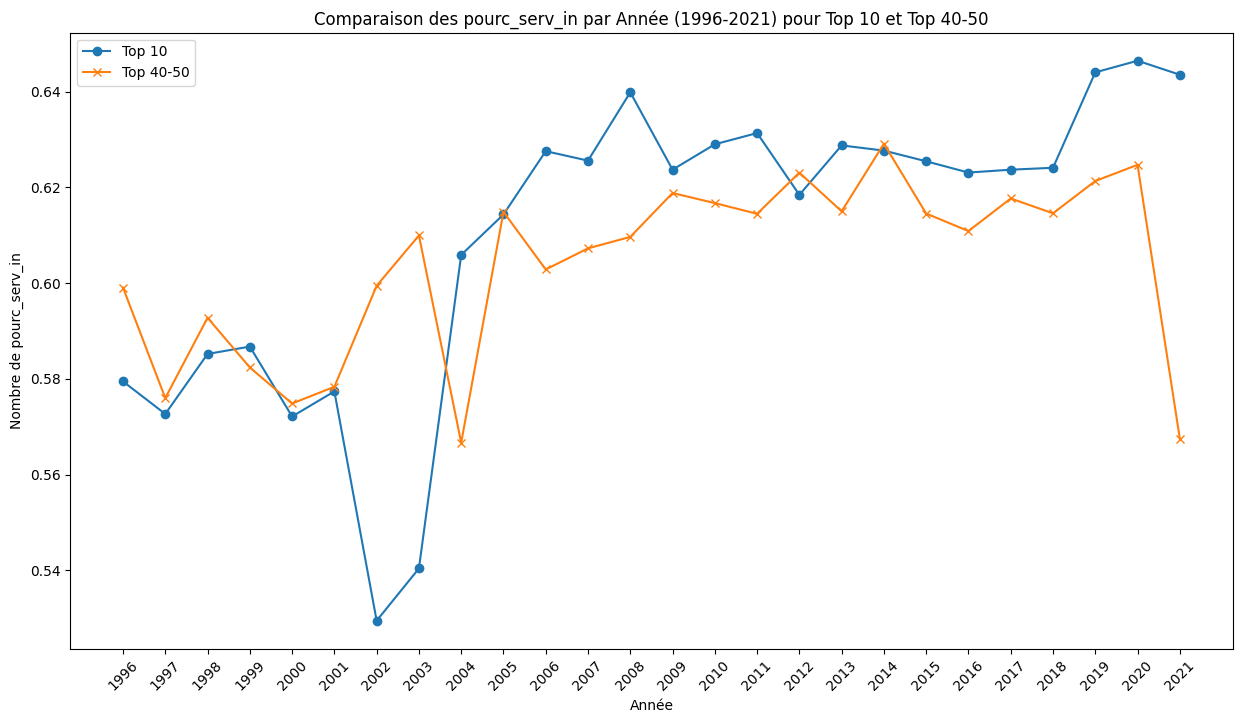

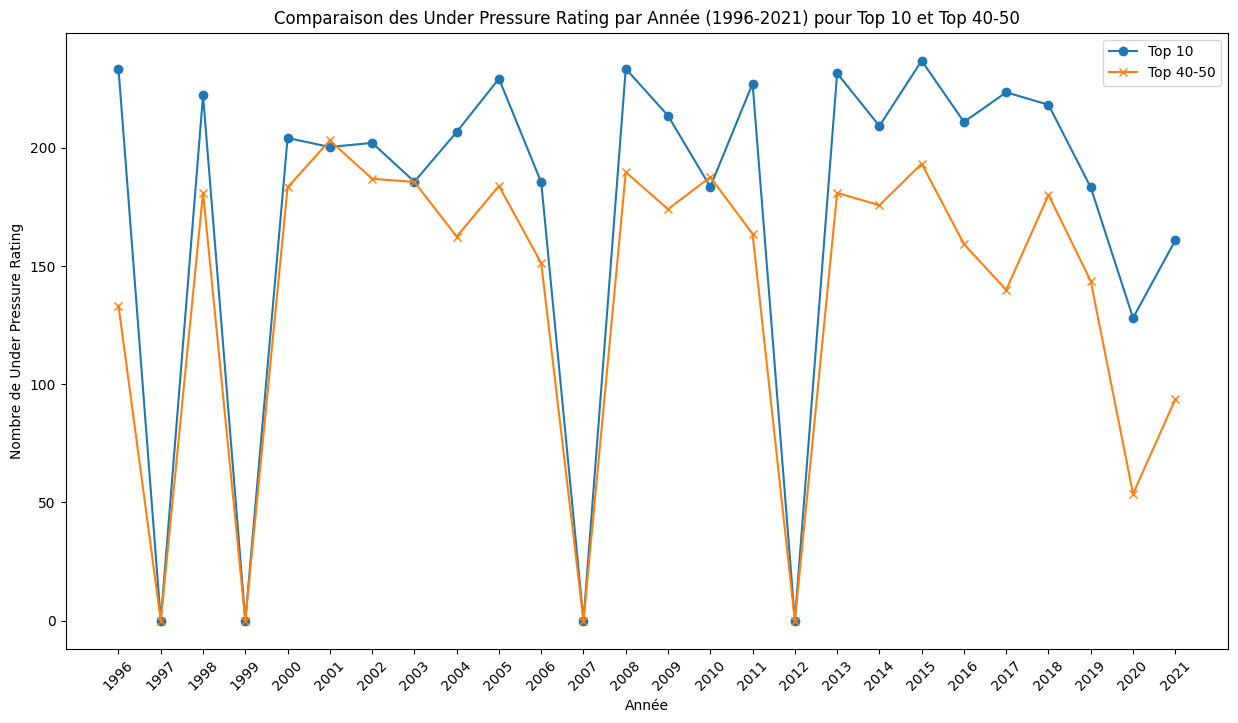

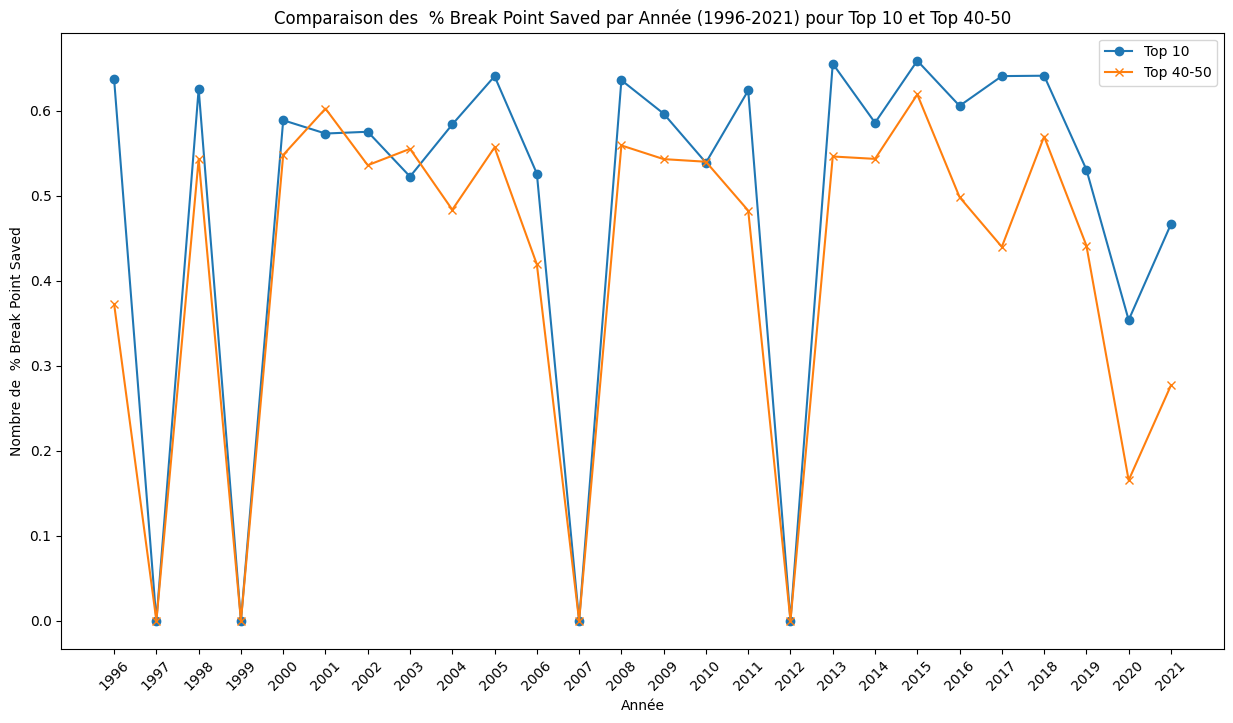

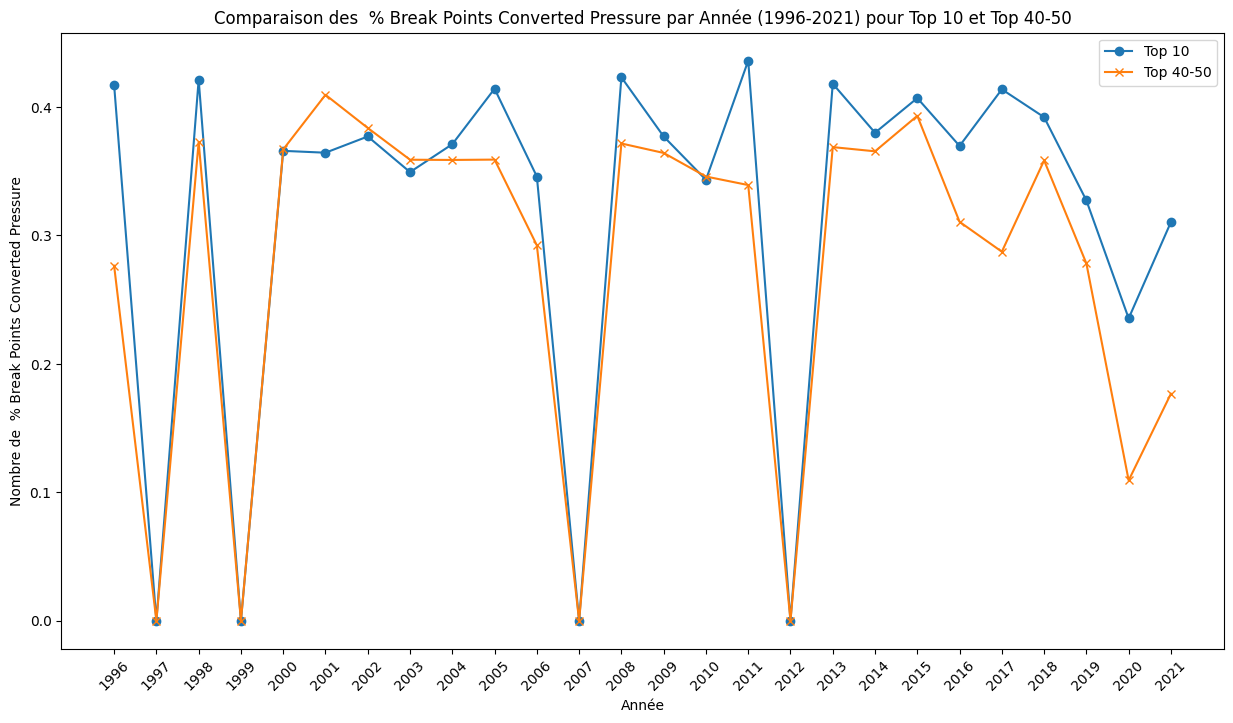

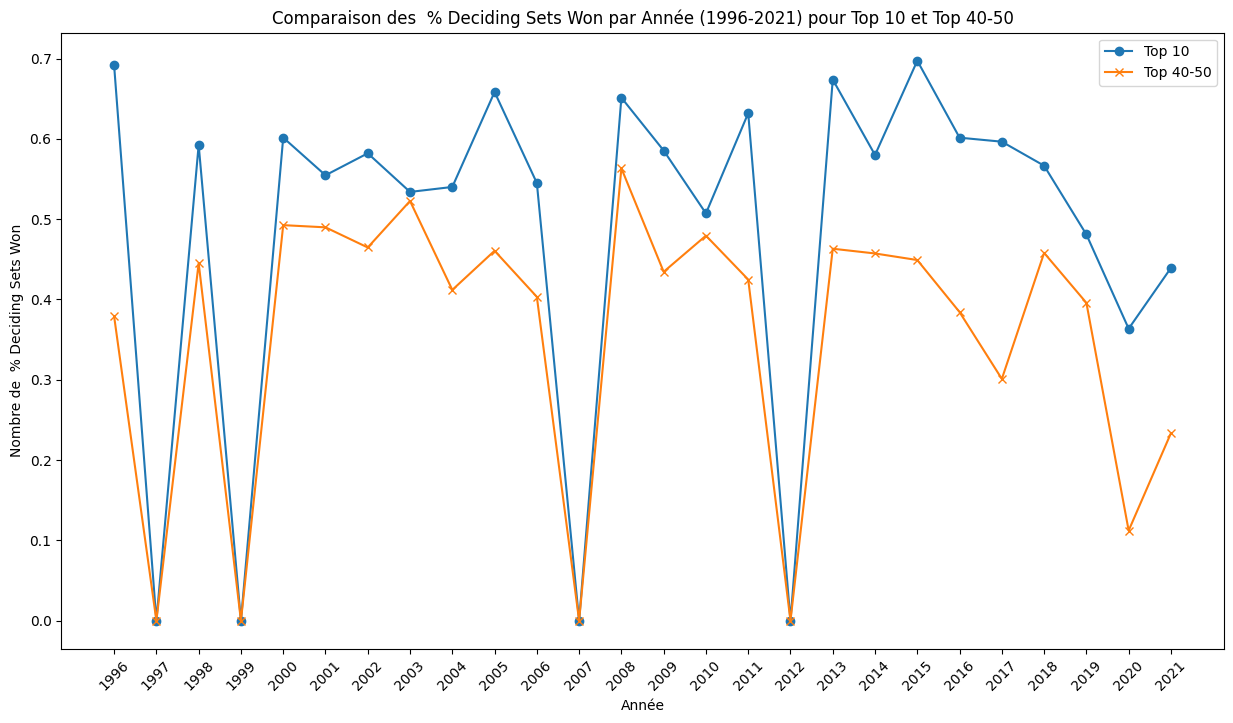

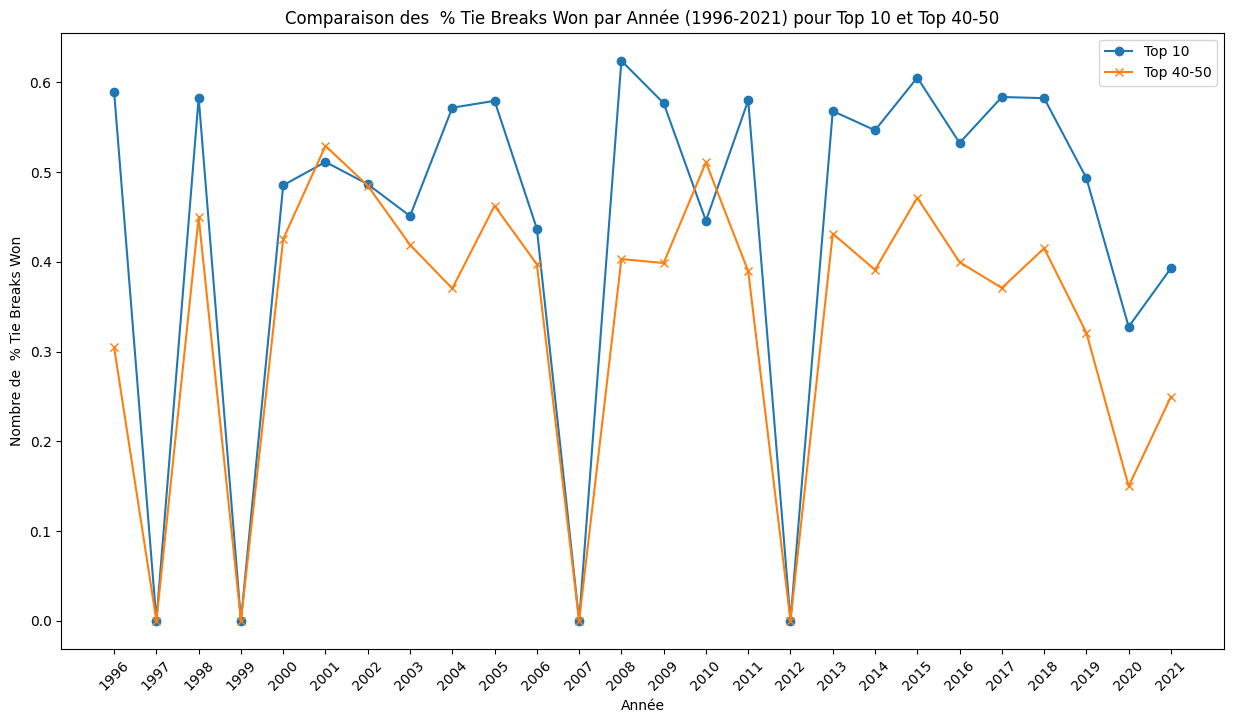

In [52]:
import matplotlib.pyplot as plt


def generer_graphique(resultats_top10, resultats_top40_50, annee_debut=1996, annee_fin=2021, statistique='matchs'):
    # Générer la liste des années
    annees = [str(annee) for annee in range(annee_debut, annee_fin + 1)]

    # Extraire les valeurs pour la statistique donnée
    valeurs_top10 = [resultats_top10.get(annee, {}).get(statistique, 0) for annee in annees]
    valeurs_top40_50 = [resultats_top40_50.get(annee, {}).get(statistique, 0) for annee in annees]

    # Créer le graphique
    plt.figure(figsize=(15, 8))
    plt.plot(annees, valeurs_top10, label='Top 10', marker='o')
    plt.plot(annees, valeurs_top40_50, label='Top 40-50', marker='x')
    plt.title(f'Comparaison des {statistique} par Année ({annee_debut}-{annee_fin}) pour Top 10 et Top 40-50')
    plt.xlabel('Année')
    plt.ylabel(f'Nombre de {statistique}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

cles_liste = [
    'matchs',
    'win',
    'pourc_return_win_pnt',
    'pourc_break_games',
    'pourc_break_point_made',
    'pourc_break_point_saved',
    'pourc_serv_games_win',
    'pourc_serv_in',
    'Under Pressure Rating',
    ' % Break Point Saved',
    ' % Break Points Converted Pressure',
    ' % Deciding Sets Won',
    ' % Tie Breaks Won'
]
for i in cles_liste:
    generer_graphique(resultats_par_anneetop10,resultats_par_anneetop40_50,annee_debut=1996,annee_fin=2021,statistique=str(i))
 


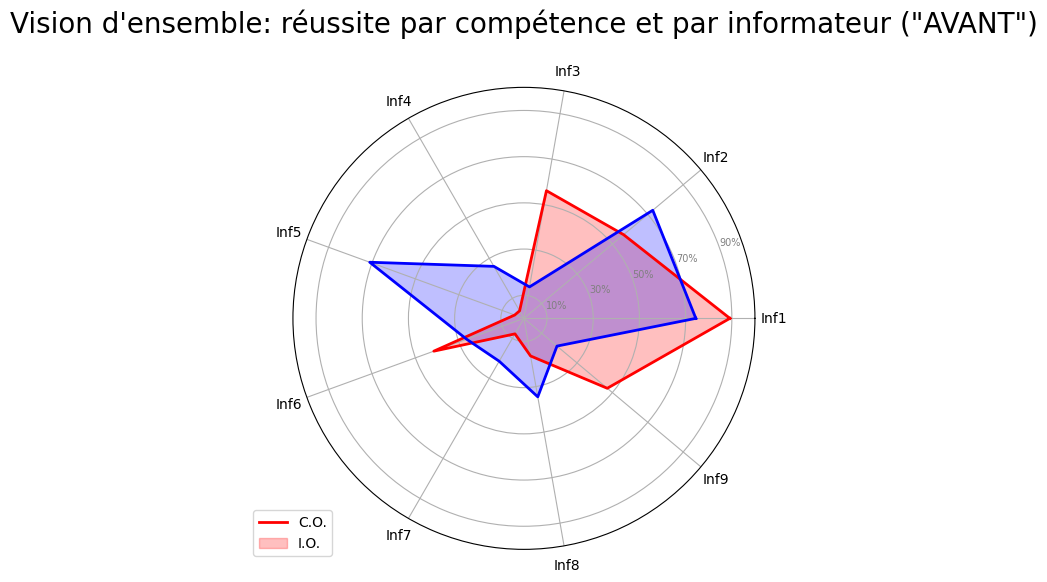

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of variables
num_vars = 9

# Create a 2D array of shape (2, num_vars)
# Replace this with your actual data
values = np.random.rand(2, num_vars) * 100
values = np.concatenate((values, values[:,[0]]), axis=1)  # Close the loop

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first value to close the loop

# Draw the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
labels = ['Inf1', 'Inf2', 'Inf3', 'Inf4', 'Inf5', 'Inf6', 'Inf7', 'Inf8', 'Inf9']
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Draw ylabels
ax.set_rscale('linear')
ax.set_rlabel_position(180 / num_vars)
plt.yticks([10, 30, 50, 70, 90], ["10%", "30%", "50%", "70%", "90%"], color="grey", size=7)
plt.ylim(0, 100)

# Plot data and fill with color
ax.plot(angles, values[0], color='red', linewidth=2, linestyle='solid')
ax.fill(angles, values[0], color='red', alpha=0.25)

ax.plot(angles, values[1], color='blue', linewidth=2, linestyle='solid')
ax.fill(angles, values[1], color='blue', alpha=0.25)

# Add a title and legend
plt.title('Vision d\'ensemble: réussite par compétence et par informateur ("AVANT")', size=20, color='black', y=1.1)
ax.legend(['C.O.', 'I.O.'], loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()
